# Optimization, Modeling, and Prediction

The purpose of this notebook is to utilize concepts from both optimization modeling and machine learning to solve business problems with varying needs. The first deals with a non-profit UMD baking facility where the goal is to maximize total profit across two different kinds of cookies with varying baking requirements and constraints. Given the nature of the problem, we will use the linear programming method to perform the optimization. The optimization model will be accompanied by a well-formatted data visualization that conveys how the company will achieve a maximum profit. The second business problem involves a company called HireTheTerps that would like to predict how much the company will need to budget for future hires. We will train and test a linear regression machine learning model to predict and visualize example salaries.

In order to perform the data analysis of the various scenarios we must import NumPy and Pandas as they provide a basis for many of the latter libraries. Matplotlib and Seaborn will be used for data visualization while the linprog() function will be imported from SciPy to perform the linear optimization. SQLite will be used to connect to the database file that provides example data for salaries. Lastly, Scikit-Learn will be used for the topics related to the training and testing of the linear regression model. 

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import linprog
import sqlite3
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Part 1: Optimization

The non-profit UMD baking facility makes both regular and low-sugar peanut butter cookies. Regular cookies yield a profit of \\$2.14 per cookie while low-sugar cookies yield a profit of \\$4.04. These two values represent the decision variables that are assigned to quantities that will be used in the objective function to maximize total profit. The next two elements of the optimization represent the constraints which are the equations of inequality that state the limitations of the problem. Regular cookies require 0.5 cups of peanut butter and 1.25 cups of maple syrup while low-sugar cookies require 1.05 cups of peanut butter and 0.125 cups of maple syrup. The additional constraints are the number of available ingrediants for baking which correspond to 10,000 cups of peanut butter and 4,000 cups of maple syrup. The linprog() function takes in the decision variables and constraints in the objective function to find the maximum profit result.

### Optimization Model

In [16]:
coefficients = [-2.14, -4.04] # Represent the profit for each type of cookie
inequality_constraint_matrix = [[0.5, 1.05], [1.25, 0.125]] # Required amount of ingrediants for each type of ingrediant for each cookie 
inequality_constraint_vector = [10000, 4000] # Maximum number of ingrediants for each ingrediant type
result = linprog(coefficients, inequality_constraint_matrix, inequality_constraint_vector, method='simplex')
result

     con: array([], dtype=float64)
     fun: -38986.4
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0.])
  status: 0
 success: True
       x: array([2360., 8400.])

In [17]:
print(f'The highest profit that can be achieved under the stated conditions is ${abs(result.fun):,.2f} when {result.x[0]:,.0f} regular cookies are sold and {result.x[1]:,.0f} low-sugar cookies are sold.')

The highest profit that can be achieved under the stated conditions is $38,986.40 when 2,360 regular cookies are sold and 8,400 low-sugar cookies are sold.


### Optimization Visualization

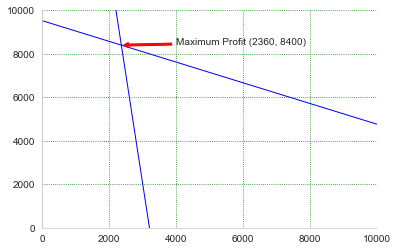

In [18]:
# Format the visualization to display full scope of graph
fig, ax = plt.subplots()
plt.axis([0., 10000., 0., 10000.])
ax.grid(True, which='both', color='g', linestyle=':')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Declare equations to plot values as a line graph
x_vals = np.linspace(0,10000)
y1 = (10000 - 0.5 * x_vals)/ 1.05  # From Formula 0.5x + 1.05y <= 10000, solve for y
y2 = (4000 - 1.25 *x_vals)/ 0.125 # From Formula, 1.25x + 0.125y <= 4000, solve for y
plt.plot(x_vals, y1, '-b', linewidth=1)
plt.plot(x_vals, y2, '-b', linewidth=1)

# Display text that shows the solution to the business problem
plt.annotate(f'Maximum Profit ({result.x[0]:.0f}, {result.x[1]:.0f})',
    xy=(result.x[0], result.x[1]),
    xytext=(4000, 8400),
    arrowprops={"arrowstyle":"simple", "color":'r'})
plt.show()

## Part 2: Modeling and Prediction

HireTheTerps is a staffing company that hires UMD alumni and want to perform data analysis on a data set with salary data in order to predict how much the company will need to budget for some future hires. Given the data from the company's database, the goal is train a linear regression algorithm to make predictions for salaries using machine learning techniques.

### Database Connection

A database file containing a SQL table with example salaries is provided by the company. We must extract and format the data into a Pandas Dataframe in order to use in the latter machine learning model.

In [19]:
# Connect to database file
connection = sqlite3.connect('HW6-salary.db')

In [20]:
# Format into a dataframe to visualize data
salary_df = pd.read_sql('SELECT * FROM salary', connection)
salary_df.set_index('id', inplace=True)
salary_df.columns = ['Years of Experience', 'Salary']
salary_df['Salary'] = salary_df['Salary'].astype(float)
salary_df.head(10)

,Years of Experience,Salary
id,,
1,1.1,39343.0
2,1.3,46205.0
3,1.5,37731.0
4,2.0,43525.0
5,2.2,39891.0
6,2.9,56642.0
7,3.0,60150.0
8,3.2,54445.0
9,3.2,64445.0


### Setting Up and Training Machine Learning Model

In order to make predictions about employees' salaries given the employees' years of experience, we must train a model that can explain the relationship between the two variables. We will first seperate the training data from the test data in order to allow the model to learn from the training data and use the test data to later test the accuracy.

In [21]:
# Split data into training and testing groups
X_train, X_test, y_train, y_test = train_test_split(salary_df['Years of Experience'].values.reshape(-1, 1),
    salary_df['Salary'].values, random_state=11)

# Verify that 75% is training data and the other 25% is test data
print(X_train.size, 'items --', X_train.size/(X_train.size + X_test.size) * 100)
print(X_test.size, 'items --', X_test.size/(X_train.size + X_test.size) * 100)

22 items -- 73.33333333333333
8 items -- 26.666666666666668


In [22]:
# Use linear regression estimator to predict salaries using training data
salary_linear_regression = LinearRegression()
salary_linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

### Model Visualization

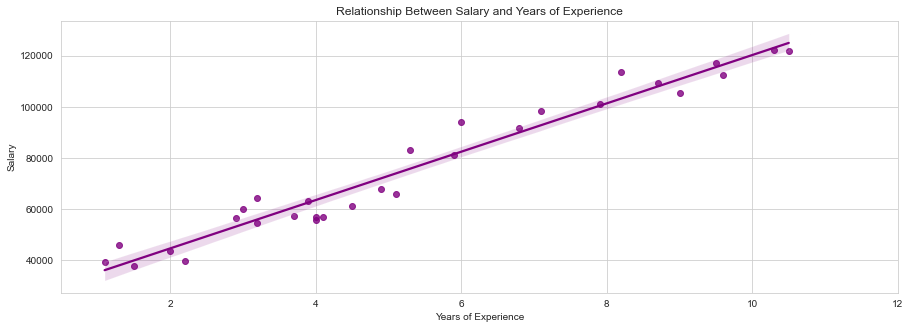

In [23]:
# Output to visualize the regression model from the 
sns.set_style('whitegrid')
fig, axes = plt.subplots()
fig.set_size_inches(15, 5)
axes = sns.regplot(x=salary_df['Years of Experience'], y=salary_df['Salary'], scatter_kws={'color': 'purple'}, line_kws={'color': 'purple'})
axes.set_xlim(0.5, 12)
axes.set_title('Relationship Between Salary and Years of Experience');

When employees have more years of experience their salary increases. Therefore, there is a positive correlation between years of experience and salary and has a linear relationship.

### Testing Machine Learning Model

To test the accuracy of the model we will compare some of the predicted results with the actual results to get a better sense of the model's performance. We will then use the coefficient of determination to evaluate the statistical accuracy of the model.

In [24]:
# Visualize some of the predicted results versus the expected results
expected = y_test
predicted = salary_linear_regression.predict(X_test)

for p, e in zip(predicted[::2], expected[::2]):  # check every 2nd element
    print('Predicted: %.2f, Expected: %.2f' % (p, e))

Predicted: 72074.29, Expected: 67938.00
Predicted: 54173.07, Expected: 60150.00
Predicted: 44751.37, Expected: 43525.00
Predicted: 68305.61, Expected: 61111.00


In [25]:
# Output of the model's accuracy
metrics.r2_score(expected, predicted)

0.9344058649705056

With an approximate accuracy of 93.44%, the model is very accurate and is well above what is considered to be a well-performing model. If the model was less accurate, then using a different estimator may provide a better result. Generally, machine learning experts consider models with 70% to 90% to be realistic and viable models. Obviously any scores above are even more ideal.

### Predicting Salaries

HireTheTerps wants to hire seven senior employees with 12, 15, 17, 18, 21, 23, and 26 years of experience. In order to estimate what salary is most appropiate for each employee, we will make predictions using the linear regression algorithm above. We will use a dataframe to visualize the years of experience and predicted salaries.

In [26]:
# Seven senior hire years of experiences
years_experience = [12, 15, 17, 18, 21, 23, 26]

# Linear equation used to predict salaries
salary_predict = lambda x: salary_linear_regression.coef_ * x + salary_linear_regression.intercept_

# Create dataframe to visualize values
prediction_df = pd.DataFrame({'Years of Experience' : years_experience, 'Salary' : salary_predict(years_experience)})
prediction_df

,Years of Experience,Salary
0,12,138968.320088
1,15,167233.405003
2,17,186076.794947
3,18,195498.489918
4,21,223763.574833
5,23,242606.964776
6,26,270872.049691


### Model Visualization With Predictions

Now that we have predicted the salaries for the seven senior hires, we can combine the data from the original data from the database with the predictions derived from the machine learning model. We must concatenate the two dataframes into one in order to use as the data for creating the data visualization.

In [27]:
# Combine original data and predicted data to use for visualization
salary_full_df = pd.concat([salary_df, prediction_df])
salary_full_df

,Years of Experience,Salary
1,1.1,39343.000000
2,1.3,46205.000000
3,1.5,37731.000000
4,2.0,43525.000000
5,2.2,39891.000000
6,2.9,56642.000000
7,3.0,60150.000000
8,3.2,54445.000000
9,3.2,64445.000000
10,3.7,57189.000000


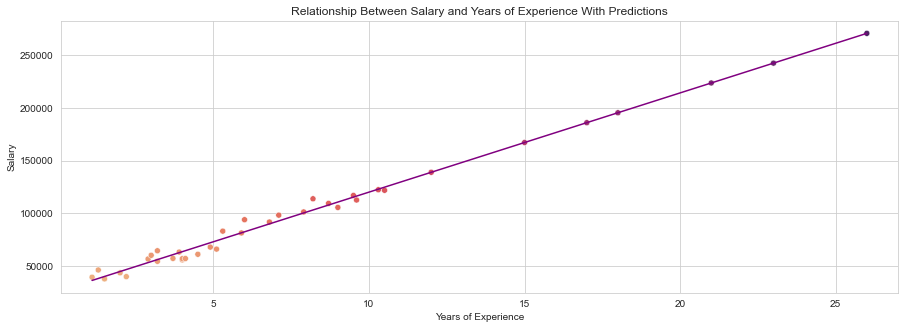

In [28]:
# Set up scatter plot for all data
sns.set_style('whitegrid')
fig, axes = plt.subplots()
fig.set_size_inches(15, 5)
axes = sns.scatterplot(data=salary_full_df, x='Years of Experience', y='Salary', hue='Salary', palette='flare', legend=False)    
axes.set_xlim(min(salary_full_df['Years of Experience'].values - 1), max(salary_full_df['Years of Experience'].values + 1))  # scale x-axis 
axes.set_title('Relationship Between Salary and Years of Experience With Predictions')

# Visualize line to see the accuracy of prediction points
x = np.array([min(salary_full_df['Years of Experience'].values), max(salary_full_df['Years of Experience'].values)]) # creates an array from -2021
y = salary_predict(x)
line = plt.plot(x, y, 'purple');